In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [2]:
import pandas as pd

# Load the Injury_and_Fatality dataset
file_path = 'Injury_and_Fatality.csv'  # Ensure this file exists in your working directory
injury_and_fatality = pd.read_csv(file_path)

# Step 1: Data Cleaning

# Convert CRASH DATE to datetime
injury_and_fatality['CRASH DATE'] = pd.to_datetime(injury_and_fatality['CRASH DATE'], errors='coerce')

# Fill NaN values in injury and fatality columns with 0
injury_and_fatality['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF CYCLIST INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF CYCLIST KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF MOTORIST INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF MOTORIST KILLED'].fillna(0, inplace=True)

# Convert injury and fatality columns to int64
injury_and_fatality['NUMBER OF PERSONS INJURED'] = injury_and_fatality['NUMBER OF PERSONS INJURED'].astype('int64')
injury_and_fatality['NUMBER OF PERSONS KILLED'] = injury_and_fatality['NUMBER OF PERSONS KILLED'].astype('int64')
injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'] = injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'].astype('int64')
injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'] = injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'].astype('int64')
injury_and_fatality['NUMBER OF CYCLIST INJURED'] = injury_and_fatality['NUMBER OF CYCLIST INJURED'].astype('int64')
injury_and_fatality['NUMBER OF CYCLIST KILLED'] = injury_and_fatality['NUMBER OF CYCLIST KILLED'].astype('int64')
injury_and_fatality['NUMBER OF MOTORIST INJURED'] = injury_and_fatality['NUMBER OF MOTORIST INJURED'].astype('int64')
injury_and_fatality['NUMBER OF MOTORIST KILLED'] = injury_and_fatality['NUMBER OF MOTORIST KILLED'].astype('int64')

# Remove Duplicates
injury_and_fatality.drop_duplicates(inplace=True)

# Remove rows with NaN in 'BOROUGH' column
injury_and_fatality.dropna(subset=['BOROUGH'], inplace=True)

# Remove rows with 'UNKNOWN' in 'ON STREET NAME'
injury_and_fatality = injury_and_fatality[injury_and_fatality['ON STREET NAME'] != 'UNKNOWN']

# Create new columns for total injuries and fatalities
injury_and_fatality['TOTAL_INJURED'] = (
    injury_and_fatality['NUMBER OF PERSONS INJURED'] +
    injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'] +
    injury_and_fatality['NUMBER OF CYCLIST INJURED'] +
    injury_and_fatality['NUMBER OF MOTORIST INJURED']
)

injury_and_fatality['TOTAL_KILLED'] = (
    injury_and_fatality['NUMBER OF PERSONS KILLED'] +
    injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'] +
    injury_and_fatality['NUMBER OF CYCLIST KILLED'] +
    injury_and_fatality['NUMBER OF MOTORIST KILLED']
)



In [3]:
# # Save the cleaned dataset
# cleaned_file_path = 'Injury_and_Fatality_Cleaned.csv'  # Specify the desired path and file name
# injury_and_fatality.to_csv(cleaned_file_path, index=False)

# print(f"Cleaned dataset saved as: {cleaned_file_path}")


In [4]:
# Summarize data for total counts
borough_summary_total = injury_and_fatality.groupby('BOROUGH').sum(numeric_only=True)[['TOTAL_INJURED', 'TOTAL_KILLED']].reset_index()

print(borough_summary_total)

         BOROUGH  TOTAL_INJURED  TOTAL_KILLED
0          BRONX          52047           224
1       BROOKLYN         106849           482
2      MANHATTAN          42201           284
3         QUEENS          92288           419
4  STATEN ISLAND          12566            71


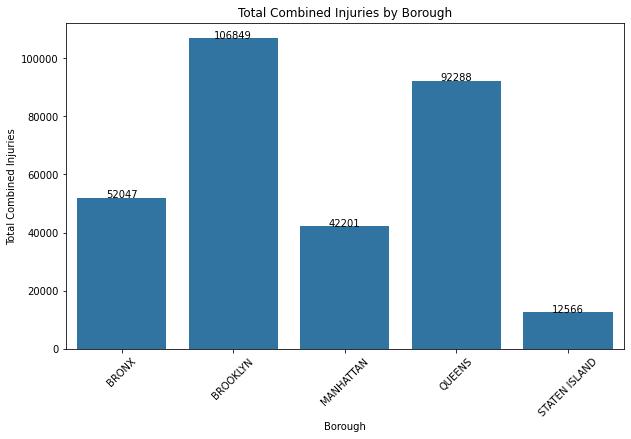

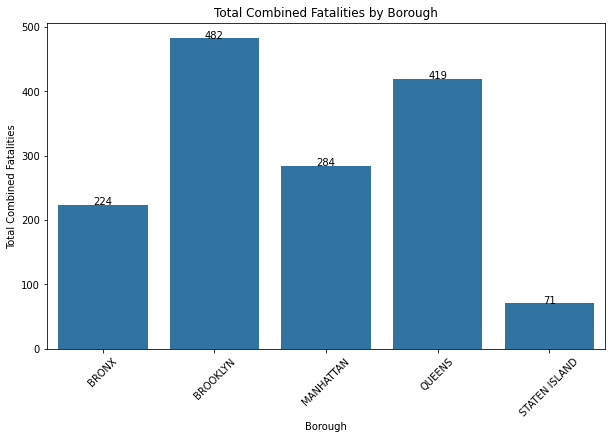

In [5]:
# Visualize Data

# Visualize Total Combined Injuries and Fatalities
plt.figure(figsize=(10, 6))
combined_plot_total = sns.barplot(x='BOROUGH', y='TOTAL_INJURED', data=borough_summary_total)

# Add numbers on top of bars for total combined injuries
for index, row in borough_summary_total.iterrows():
    combined_plot_total.text(index, row['TOTAL_INJURED'], int(row['TOTAL_INJURED']), color='black', ha="center")

plt.title('Total Combined Injuries by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Combined Injuries')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Fatalities
plt.figure(figsize=(10, 6))
fatalities_plot_total = sns.barplot(x='BOROUGH', y='TOTAL_KILLED', data=borough_summary_total)

# Add numbers on top of bars for total fatalities
for index, row in borough_summary_total.iterrows():
    fatalities_plot_total.text(index, row['TOTAL_KILLED'], int(row['TOTAL_KILLED']), color='black', ha="center")

plt.title('Total Combined Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Combined Fatalities')
plt.xticks(rotation=45)
plt.show()

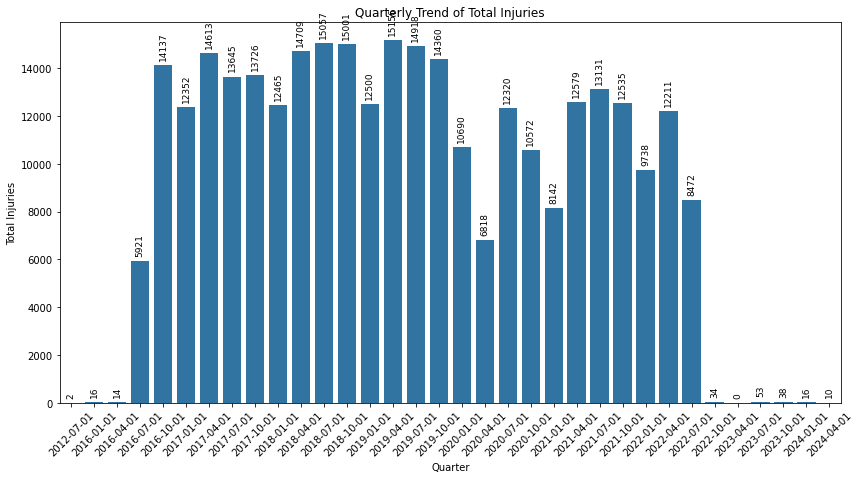

In [29]:
# Ensure CRASH DATE is a datetime object
injury_and_fatality['CRASH DATE'] = pd.to_datetime(injury_and_fatality['CRASH DATE'], errors='coerce')

# Extract the quarter for grouping
injury_and_fatality['QUARTER'] = injury_and_fatality['CRASH DATE'].dt.to_period('Q')

# Group by QUARTER and sum the total injuries and fatalities
quarterly_summary = injury_and_fatality.groupby('QUARTER').sum().reset_index()

# Convert QUARTER back to datetime for plotting
quarterly_summary['QUARTER'] = quarterly_summary['QUARTER'].dt.to_timestamp()

# Plot Bar Graph for Total Injuries
plt.figure(figsize=(14, 7))
injuries_plot = sns.barplot(x='QUARTER', y='TOTAL_INJURED', data=quarterly_summary)
plt.title('Quarterly Trend of Total Injuries')
plt.xlabel('Quarter')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)

# Add numbers on top of bars with better positioning
for p in injuries_plot.patches:
    injuries_plot.annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', fontsize=9, color='black', 
                           xytext=(0, 5), textcoords='offset points', rotation=90)

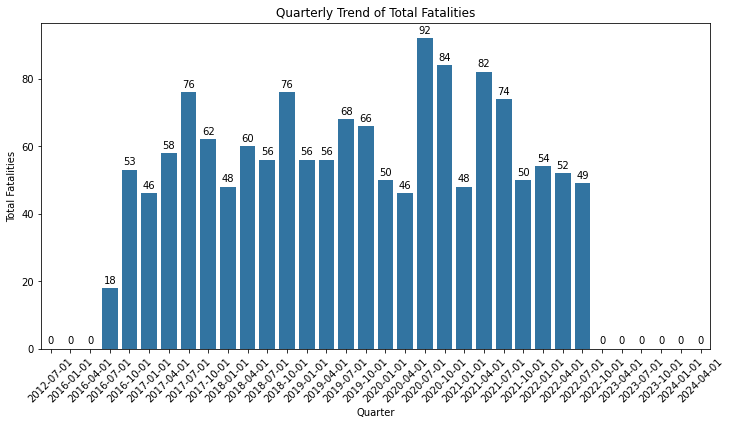

In [28]:
# Plot Bar Graph for Total Fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='QUARTER', y='TOTAL_KILLED', data=quarterly_summary)
plt.title('Quarterly Trend of Total Fatalities')
plt.xlabel('Quarter')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)

# Add numbers on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


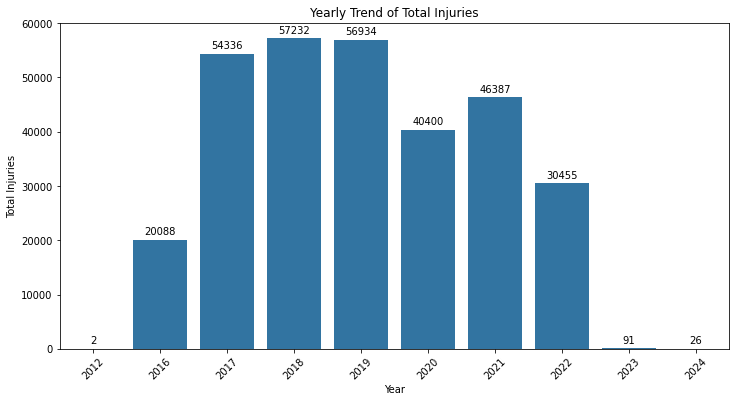

In [30]:
# Plot Bar Graph for Total Injuries
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='TOTAL_INJURED', data=yearly_summary)
plt.title('Yearly Trend of Total Injuries')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)

# Add numbers on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()



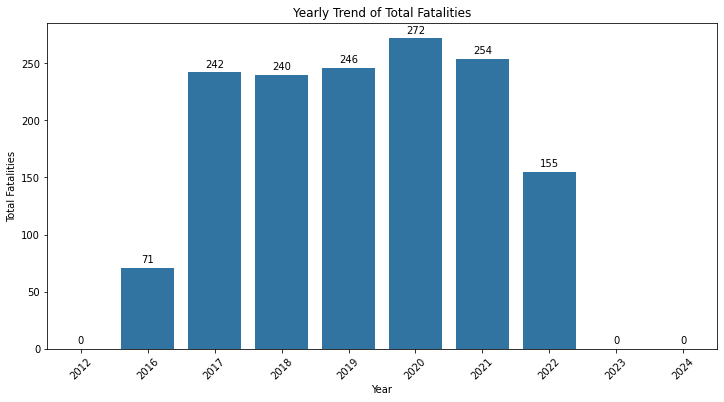

In [31]:
# Plot Bar Graph for Total Fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='TOTAL_KILLED', data=yearly_summary)
plt.title('Yearly Trend of Total Fatalities')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)

# Add numbers on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()